# Intensive lectures at RESCEU 
## (17-19th April 2023)


# Hands-on 2: Survival probability of free vacuum in 1+1D transverse Ising model
$$ H= -J\sum_{n=1}^{N-1}Z_n Z_{n+1} -h\sum_{n=1}^N X_n  $$
## (with open boundary condition)

### For J=0, ground state is
$$ |{\rm vac}_0 \rangle \equiv H|0\rangle \otimes \cdots H|0\rangle  $$
### We are intested in computing the quantity
$$ P(t) \equiv \left| \langle{\rm vac}_0 | e^{-iHt} |{\rm vac}_0 \rangle \right|^2 $$

###  Import packages

In [1]:
import numpy as np
from qiskit import *
import math

### Let us fix the parameters 

In [2]:
N=4
J=1.0
h=2.0

## Excercise 1: Draw quantum circuit for constructing the state $|{\rm vac}_0 \rangle$

## Answer

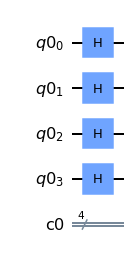

In [3]:
# the number of qubits
q = QuantumRegister(N)
c = ClassicalRegister(N)
qc = QuantumCircuit(q,c)

#Get |vac_0>
for n in range(N):
 qc.h(q[n])

qc.draw(output='mpl')

### Let us construct time evolution operator
$$ e^{-iHt} = e^{-i (H_X +H_{ZZ})t}, $$
### where
$$ H_X = -h \sum_{n=1}^N X_n ,\quad H_{ZZ}=-J\sum_{n=1}^{N-1}Z_n Z_{n+1}$$

### For this purpose, we use Suzuki-Trotter decomposition
$$ e^{-iHt} = \left( e^{-iH\frac{t}{M}} \right)^M
\simeq \left( e^{-iH_X \frac{t}{M}} e^{-iH_{ZZ} \frac{t}{M}} \right)^M
 +\mathcal{O}(1/M) ,$$
### where $M$ is a large positive integer

### The two operators can be written in terms of elementary gates:
$$ e^{-iH_X \frac{t}{M} }= \prod_{n=1}^N e^{\frac{iht}{M}X_n}
= \prod_{n=1}^N R_X^{(n)} \left( -\frac{2ht}{M} \right) $$
$$ e^{-i H_{ZZ} \frac{t}{M}} 
=\prod_{n=1}^{N-1} e^{\frac{iJt}{M} Z_n Z_{n+1}} 
=\prod_{n=1}^{N-1} CX^{(n,n+1)} R_Z^{(n+1)}\left( -\frac{2Jt}{M} \right) CX^{(n,n+1)} $$

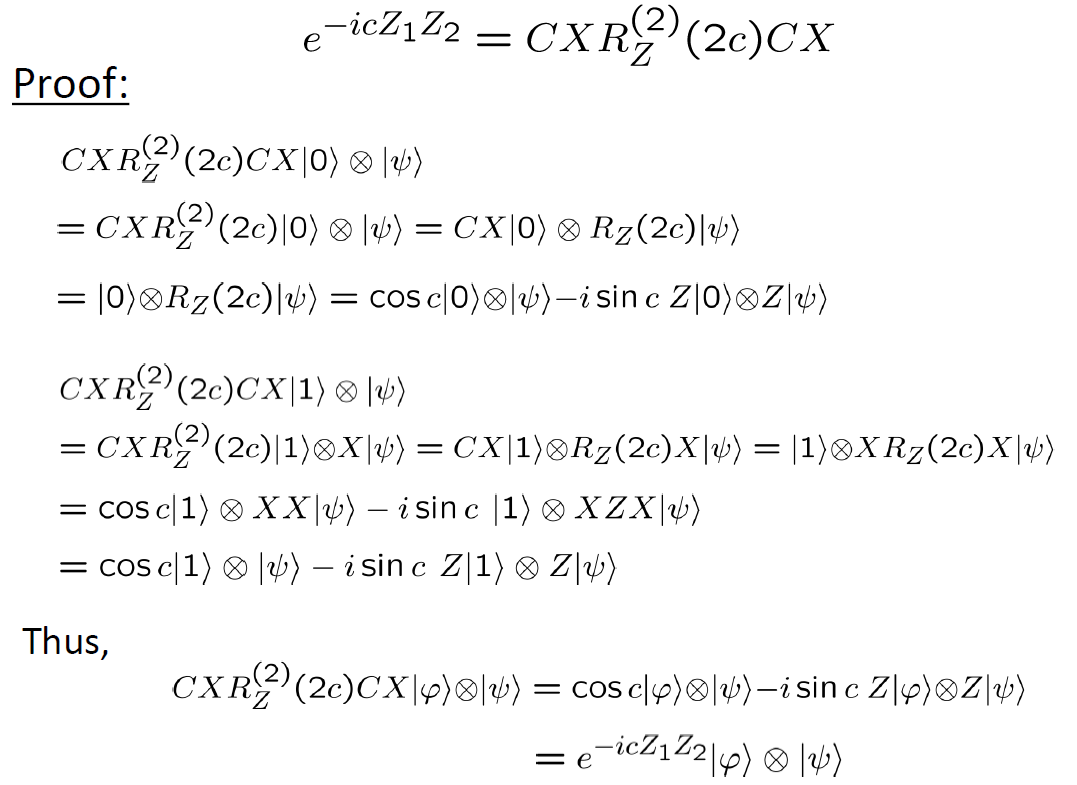

## Excercise 2: Draw a quantum circuit for
$$ e^{-iHt} |{\rm vac}_0 \rangle $$
## for $t=0.1, M=1$ (one time step). 

## Answer

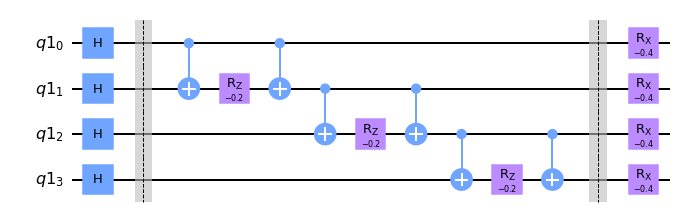

In [4]:
# definition of parameters
t=0.1
M=1
# just for convenience
dt=t/M
coeffX=-2*h*dt
coeffZZ=-2*J*dt

# the number of qubits
q = QuantumRegister(N)
qc = QuantumCircuit(q)
#c = ClassicalRegister(N)
#qc = QuantumCircuit(q,c)

#Get |vac_0>
for n in range(N):
 qc.h(q[n])

qc.barrier(q)

    
#Act exp(-i H_ZZ t/M)
for n in range (N-1):
 qc.cx(q[n],q[n+1])
 qc.rz(coeffZZ,q[n+1])   
 qc.cx(q[n],q[n+1])

qc.barrier(q)

#Act exp(-i H_X t/M)
for n in range (N):
 qc.rx(coeffX,q[n])   

qc.draw(output='mpl')

## Excercise 3: Compute the probability
$$ P(t) =\left| \langle {\rm vac}_0 | e^{-iHt} |{\rm vac}_0 \rangle \right|^2 $$
## for $t=0.1$ using Trotter decomposition with $M=1$ (one time step) by 10000 shots . 

$$  \langle {\rm vac}_0 | e^{-iHt} |{\rm vac}_0 \rangle 
= \langle 00\cdots 0 | \left( \prod_{n=1}^N H^{(n)} \right) e^{-iHt} \left( \prod_{n=1}^N H^{(n)} \right) |00\cdots 0 \rangle $$
$$\left| \langle i_1 i_2 \cdots i_N | \left( \prod_{n=1}^N H^{(n)} \right) e^{-iHt} \left( \prod_{n=1}^N H^{(n)} \right) |00\cdots 0 \rangle \right|^2 $$


## Answer

0.9685


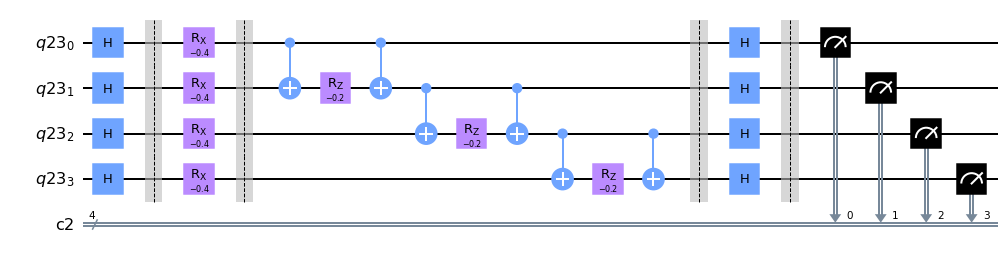

In [6]:
# definition of parameters
t=0.1
M=1
shot_times=10000
# just for convenience
dt=t/M
coeffX=-2*h*dt
coeffZZ=-2*J*dt

# the number of qubits
q = QuantumRegister(N)
c = ClassicalRegister(N)
qc = QuantumCircuit(q,c)

#Get |vac_0>
for n in range(N):
 qc.h(q[n])

qc.barrier(q)

#Act exp(-i H_X t/M)
for n in range (N):
 qc.rx(coeffX,q[n])   
    
qc.barrier(q)

#Act exp(-i H_ZZ t/M)
for n in range (N-1):
 qc.cx(q[n],q[n+1])
 qc.rz(coeffZZ,q[n+1])   
 qc.cx(q[n],q[n+1])

qc.barrier(q)
#Inverse procedure of getting |vac_0>
for n in range(N):
 qc.h(q[n])

qc.barrier(q)


# Make measurement 1000 times
qc.measure(q[0:N],c[0:N]) 
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=shot_times)
result = job.result()
counts = result.get_counts(qc)

#print(counts)
print(counts['0000']/shot_times)

qc.draw(output='mpl')

### Repeating the time evolution many times and measuring it, we can obtain data of $P(t)$ for various $t$.
### For this purpose, it is more convinient to divide the circuit into time evolution part and measurement part

In [7]:
# definition of parameters
#N=4
tmax=1.0
M=20
shot_times=10000
# just for convenience
dt=tmax/M
coeffX=-2*h*dt
coeffZZ=-2*J*dt

q = QuantumRegister(N)
c = ClassicalRegister(N)
simulator = Aer.get_backend('qasm_simulator')
# circuit for time evolution
qc = QuantumCircuit(q,c)
# circuit for measument
meas = QuantumCircuit(q, c)
meas.measure(q[0:N],c[0:N]) 


#Get |vac_0>
for n in range(N):
 qc.h(q[n])


time=[]
prob=[]

### Repeating time evolution
for j in range(M):
#Act exp(-i H_X t/M)
 for n in range (N):
  qc.rx(coeffX,q[n])   
    
#Act exp(-i H_ZZ t/M)
 for n in range (N-1):
  qc.cx(q[n],q[n+1])
  qc.rz(coeffZZ,q[n+1])   
  qc.cx(q[n],q[n+1])

#Inverse procedure of getting |vac_0>
 for n in range(N):
  qc.h(q[n])

# Make measurement
 total=qc.compose(meas)
# total=qc +meas
 job = execute(total, simulator, shots=shot_times)
 result = job.result()
 counts = result.get_counts(total)
# Add data for time and probability
 time.append(dt*(j+1))
 prob.append(counts['0000']/shot_times)

# cancel H to go to next time step
 for n in range(N):
  qc.h(q[n])

print(time)
print(prob)

[0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0]
[0.9923, 0.9733, 0.9422, 0.8999, 0.8738, 0.8499, 0.8314, 0.8352, 0.8493, 0.8639, 0.8888, 0.9078, 0.9303, 0.934, 0.9428, 0.9439, 0.9345, 0.9253, 0.919, 0.9129]


### Draw a plot using the data

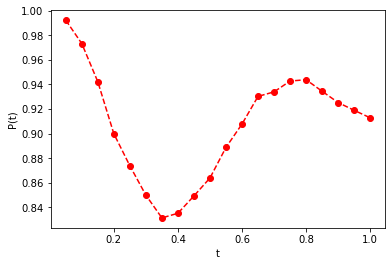

In [8]:
import matplotlib.pyplot as plt
# %matplotlib inline

plt.xlabel("t")
plt.ylabel("P(t)")
plt.plot(time, prob, marker="o", color = "red", linestyle = "--")
plt.show()

## Excercise 4: Take $N=6$ and consider Trotter decomposition of the time evolution
$$ e^{-iHt_{max}} $$
## with $t_{max}=1$ and $M=20$. Then, computing the probability
$$ \left| \langle {\rm vac}_0 | \left( e^{-iH\frac{t_{max}}{M} } \right)^n |{\rm vac}_0 \rangle \right|^2 $$
## for $n=1,2, \cdots ,M$ by 10000 shots, draw a plot for (approximated) $P(t)$.

## Answer

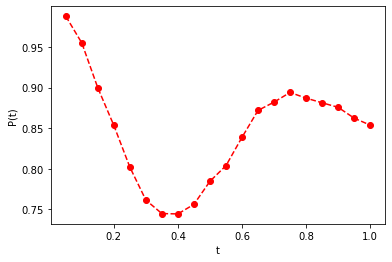

In [9]:
# definition of parameters
N=6
J=1.0
h=2.0
tmax=1.0
M=20
shot_times=10000
# just for convenience
dt=tmax/M
coeffX=-2*h*dt
coeffZZ=-2*J*dt

q = QuantumRegister(N)
c = ClassicalRegister(N)
simulator = Aer.get_backend('qasm_simulator')
# circuit for time evolution
qc = QuantumCircuit(q,c)
# circuit for measument
meas = QuantumCircuit(q, c)
meas.measure(q[0:N],c[0:N]) 


#Get |vac_0>
for n in range(N):
 qc.h(q[n])


time=[]
prob=[]

### Repeating t}ime evolution
for j in range(M):
#Act exp(-i H_X t/M)
 for n in range (N):
  qc.rx(coeffX,q[n])   
    
#Act exp(-i H_ZZ t/M)
 for n in range (N-1):
  qc.cx(q[n],q[n+1])
  qc.rz(coeffZZ,q[n+1])   
  qc.cx(q[n],q[n+1])

#Inverse procedure of getting |vac_0>
 for n in range(N):
  qc.h(q[n])

# Make measurement
 total=qc.compose(meas)
# total=qc +meas
 job = execute(total, simulator, shots=shot_times)
 result = job.result()
 counts = result.get_counts(total)
# Add data for time and probability
 time.append(dt*(j+1))
 prob.append(counts['000000']/shot_times)

# cancel H to go to next time step
 for n in range(N):
  qc.h(q[n])

#print(time)
#print(prob)

plt.xlabel("t")
plt.ylabel("P(t)")
plt.plot(time, prob, marker="o", color = "red", linestyle = "--")
plt.show()

## Excercise 5: Let us take periodic boundary condition:
$$ H= -J\sum_{n=1}^N Z_n Z_{n+1} -h\sum_{n=1}^N X_n  $$
## with $Z_{N+1}=Z_1$.
## Then compute
$$ P(t) \equiv \left| \langle{\rm vac}_0 | e^{-iHt} |{\rm vac}_0 \rangle \right|^2 $$
## for $N=4, J=1, h=2$ and $t=0.05, 0.1,\cdots ,1.0$ using Trotter decomposition with $M=20$ by 10000 shots

## Answer

[0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0]
[0.9905, 0.9615, 0.9258, 0.8796, 0.8419, 0.8036, 0.7816, 0.7671, 0.7614, 0.7666, 0.7675, 0.774, 0.7829, 0.7965, 0.8099, 0.8303, 0.8613, 0.8886, 0.928, 0.9647]


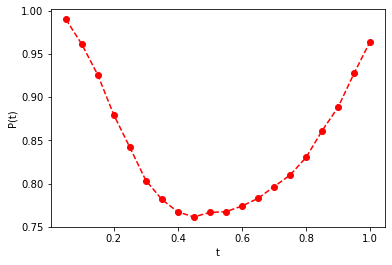

In [10]:
# definition of parameters
N=4
J=1.0
h=2.0
tmax=1.0
M=20
shot_times=10000
# just for convenience
dt=tmax/M
coeffX=-2*h*dt
coeffZZ=-2*J*dt

q = QuantumRegister(N)
c = ClassicalRegister(N)
simulator = Aer.get_backend('qasm_simulator')
# circuit for time evolution
qc = QuantumCircuit(q,c)
# circuit for measument
meas = QuantumCircuit(q, c)
meas.measure(q[0:N],c[0:N]) 


#Get |vac_0>
for n in range(N):
 qc.h(q[n])


time=[]
prob=[]

### Repeating t}ime evolution
for j in range(M):
#Act exp(-i H_X t/M)
 for n in range (N):
  qc.rx(coeffX,q[n])   
    
#Act exp(-i H_ZZ t/M)
 for n in range (N-1):
  qc.cx(q[n],q[n+1])
  qc.rz(coeffZZ,q[n+1])   
  qc.cx(q[n],q[n+1])

# because of p.b.c.
# minus if a.p.b.c.
 qc.cx(q[N-1],q[0])
 qc.rz(+coeffZZ,q[0])   
 qc.cx(q[N-1],q[0])


#Inverse procedure of getting |vac_0>
 for n in range(N):
  qc.h(q[n])

# Make measurement
 total=qc.compose(meas)
# total=qc +meas
 job = execute(total, simulator, shots=shot_times)
 result = job.result()
 counts = result.get_counts(total)
# Add data for time and probability
 time.append(dt*(j+1))
 prob.append(counts['0000']/shot_times)

# cancel H to go to next time step
 for n in range(N):
  qc.h(q[n])

print(time)
print(prob)

plt.xlabel("t")
plt.ylabel("P(t)")
plt.plot(time, prob, marker="o", color = "red", linestyle = "--")
plt.show()